<a href="https://colab.research.google.com/github/djuanthomas22/My-new-repo/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression


In [25]:
my_house_data = pd.read_csv("/content/kc_house_data 3 (1) (1).csv")
# set my target feature
my_house_label = 'sqft_living'
my_house_label2 = 'price'
my_house_label3 = 'sqft_lot'
# Select a few specific colums from your DataFrame
my_house_series = my_house_data[my_house_label]
my_house_series2 = my_house_data[my_house_label2]
my_house_series3 = my_house_data[my_house_label3]

In [26]:
my_house_series

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [27]:
my_house_series2

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [28]:
my_house_series3

,sqft_lot
0,5650
1,7242
2,10000
3,5000
4,8080
...,...
21608,1131
21609,5813
21610,1350
21611,2388


In [29]:
# Drop one or more columns from your dataframe that you feel like would not be useful for the model
my_house_data = pd.read_csv("/content/kc_house_data 3 (1) (1).csv").drop(columns = ['date','id']).dropna()

In [30]:
x = my_house_data.drop(columns = ['price'])
y = my_house_data['price']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train, y_train)

LinearRegression()

In [34]:
predicitons = model.predict(x_test)

In [35]:
predicitons

array([672746.13401323, 435146.31423817, 986753.16123552, ...,
       387928.69312451, 604739.06889077, 460737.25938494])

In [36]:
from matplotlib import pyplot as plt

In [37]:
df = pd.read_csv("/content/kc_house_data 3 (1) (1).csv").sort_values(by = 'price')
x = df['price']
y = df['sqft_living']

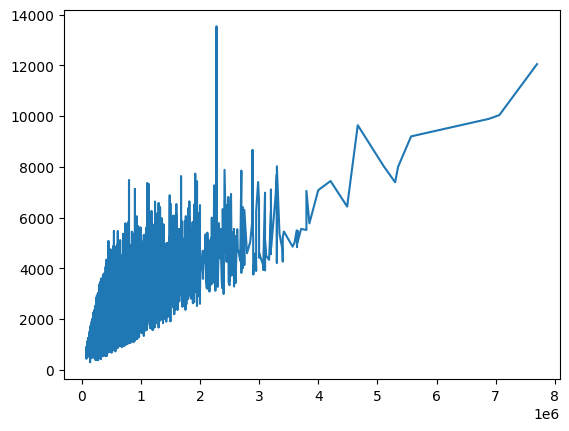

In [38]:
plt.plot(x,y)

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mean_squared_error(y_test, predicitons)

41145907457.2626